In [7]:
key = "####"

In [4]:
#!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr

In [8]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/home/catalina/anaconda3/lib/python3.8/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [9]:
df.to_csv('AAPL.csv')

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('AAPL.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-20 00:00:00+00:00,141.46,141.5000,140.23,140.400,21542038,33.385101,33.394541,33.094817,33.134937,86168152,0.0,1.0
1,AAPL,2017-03-21 00:00:00+00:00,139.84,142.8000,139.73,142.110,39529912,33.002775,33.701346,32.976815,33.538504,158119648,0.0,1.0
2,AAPL,2017-03-22 00:00:00+00:00,141.42,141.6000,139.76,139.845,25860165,33.375661,33.418142,32.983895,33.003955,103440660,0.0,1.0
3,AAPL,2017-03-23 00:00:00+00:00,140.92,141.5844,140.61,141.260,20346301,33.257659,33.414460,33.184498,33.337900,81385204,0.0,1.0
4,AAPL,2017-03-24 00:00:00+00:00,140.64,141.7400,140.35,141.500,22395563,33.191578,33.451182,33.123137,33.394541,89582252,0.0,1.0


In [22]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,AAPL,2022-03-14 00:00:00+00:00,150.62,154.12,150.10,151.45,108732111,150.62,154.12,150.10,151.45,108732111,0.0,1.0
1256,AAPL,2022-03-15 00:00:00+00:00,155.09,155.57,150.38,150.90,92964302,155.09,155.57,150.38,150.90,92964302,0.0,1.0
1257,AAPL,2022-03-16 00:00:00+00:00,159.59,160.00,154.46,157.05,102300157,159.59,160.00,154.46,157.05,102300157,0.0,1.0
1258,AAPL,2022-03-17 00:00:00+00:00,160.62,161.00,157.63,158.61,75615376,160.62,161.00,157.63,158.61,75615376,0.0,1.0
1259,AAPL,2022-03-18 00:00:00+00:00,163.98,164.48,159.76,160.51,122055535,163.98,164.48,159.76,160.51,122055535,0.0,1.0


In [14]:
df1 = df.reset_index()['close'] #< taking close column with index

In [16]:
df1.head()

0    141.46
1    139.84
2    141.42
3    140.92
4    140.64
Name: close, dtype: float64

In [18]:
df1.shape

(1260,)

In [19]:
df1[1240:] 

1240    167.30
1241    164.32
1242    160.07
1243    162.74
1244    164.85
1245    165.12
1246    163.20
1247    166.56
1248    166.23
1249    163.17
1250    159.30
1251    157.44
1252    162.95
1253    158.52
1254    154.73
1255    150.62
1256    155.09
1257    159.59
1258    160.62
1259    163.98
Name: close, dtype: float64

In [20]:
import matplotlib.pyplot as plt

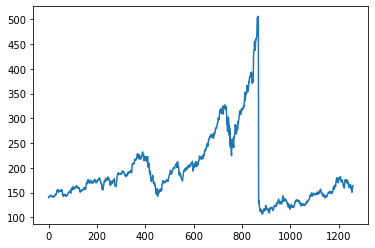

In [21]:
plt.plot(df1)

In [23]:
#LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [24]:
import numpy as np

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1.shape

(1260, 1)

In [30]:
df1

array([[0.08671259],
       [0.08265498],
       [0.0866124 ],
       ...,
       [0.13212273],
       [0.13470257],
       [0.14311835]])

In [32]:
#In case of time series data wen need to divide the data in different way
#we should divide the data based on dates because the next data is dependent on previous data

In [33]:
training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size
training_size, test_size

(819, 441)

In [34]:
train_data = df1[0:training_size,:]
train_data

array([[0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.0994114 ],
       [0.10549781],
       [0.11564183],
       [0.11809643],
       [0.116268  ],
       [0.11799624],
       [0.12338134],
       [0.12237946],
       [0.12180338],
       [0.10872887],
       [0.11446462],
       [0.11576706],
       [0.11809643],
       [0.11762054],
       [0.11646838],
       [0.117

In [35]:
test_data = df1[training_size:len(df1),:1]
test_data

array([[6.08340639e-01],
       [6.31258610e-01],
       [6.50444584e-01],
       [6.34239198e-01],
       [6.46211647e-01],
       [6.18134001e-01],
       [6.38547276e-01],
       [6.46111459e-01],
       [6.44383219e-01],
       [6.44383219e-01],
       [6.68778961e-01],
       [6.65873513e-01],
       [6.87614277e-01],
       [6.91721979e-01],
       [6.93400125e-01],
       [6.88966813e-01],
       [7.04796493e-01],
       [7.11484033e-01],
       [6.99436443e-01],
       [6.97482780e-01],
       [7.17820914e-01],
       [7.04220413e-01],
       [7.06950532e-01],
       [6.62592361e-01],
       [6.60288040e-01],
       [6.82279274e-01],
       [6.66675016e-01],
       [6.84583594e-01],
       [6.96105197e-01],
       [7.96994364e-01],
       [8.23819662e-01],
       [8.31108328e-01],
       [8.35090795e-01],
       [8.73562930e-01],
       [8.45610520e-01],
       [8.61790858e-01],
       [8.28202880e-01],
       [8.64621165e-01],
       [8.84658735e-01],
       [8.83631810e-01],


In [36]:
train_data.shape, test_data.shape

((819, 1), (441, 1))

In [38]:
#since this is timeseries data the next day output is dependent on previous day's close 
#Ex : 123,130,125,140,134,150
#timesteps = 3
# f1   f2   f3   o/p
# 123  130  125  140

#converting the data into independent and dependent data based on timestamp
#suppose the next day

# f1   f2   f3   o/p
# 130  125  140  134

#next day

# f1   f2   f3   o/p
# 125  140  134  150

# X_train        y_train
#-------------   --------
# f1   f2   f3    o/p
# 123  130  125   140
# 130  125  140   134
# 125  140  134   150

#same applicable for test data as well

In [45]:
import numpy as np

In [46]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]  #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [48]:
print(X_train)

[[0.08671259 0.08265498 0.0866124  ... 0.13016907 0.13335003 0.13580463]
 [0.08265498 0.0866124  0.08536005 ... 0.13335003 0.13580463 0.12142768]
 [0.0866124  0.08536005 0.08465874 ... 0.13580463 0.12142768 0.12683782]
 ...
 [0.52814026 0.53197245 0.52966813 ... 0.61615529 0.57372574 0.58098936]
 [0.53197245 0.52966813 0.50622417 ... 0.57372574 0.58098936 0.59148403]
 [0.52966813 0.50622417 0.52811522 ... 0.58098936 0.59148403 0.61425172]]


In [49]:
print(y_train)

[0.12142768 0.12683782 0.13277395 0.13715717 0.13552912 0.12778961
 0.12688791 0.12616155 0.13259862 0.13309956 0.13132123 0.132799
 0.13683156 0.14043832 0.14154039 0.14316844 0.14329368 0.13835942
 0.13793363 0.13630557 0.12971822 0.1369067  0.13530369 0.13227301
 0.12884158 0.13284909 0.12981841 0.12996869 0.1233062  0.11659361
 0.11283657 0.10948028 0.11596744 0.11869756 0.1163181  0.11842204
 0.11764559 0.11932373 0.11681904 0.12160301 0.12137758 0.12273012
 0.1228804  0.12450845 0.12313087 0.12561052 0.13284909 0.13432686
 0.13254853 0.12308078 0.12375704 0.12355667 0.12588604 0.1241578
 0.12666249 0.14078898 0.14998121 0.15579211 0.15040701 0.15346274
 0.16445836 0.16884158 0.17024421 0.17382592 0.17292423 0.16989355
 0.16814026 0.16155291 0.1558923  0.16095178 0.15857232 0.15814652
 0.16606137 0.17061991 0.17064496 0.16844083 0.16588604 0.15689418
 0.16283031 0.16082655 0.15769568 0.15729493 0.15571697 0.15649343
 0.15661866 0.16488416 0.1624546  0.16388228 0.16375704 0.1681402

In [51]:
X_train.shape, y_train.shape

((718, 100), (718,))

In [52]:
#reshape data into 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
#import required models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2022-03-19 13:08:03.475289: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-19 13:08:03.475328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [55]:
#Create LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2022-03-19 13:09:43.715696: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-19 13:09:43.715748: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-19 13:09:43.715786: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (catalina): /proc/driver/nvidia/version does not exist


In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 583ms/step - loss: 0.0132 - val_loss: 8.9523e-04
Epoch 2/100
12/12 [==============================] - 4s 353ms/step - loss: 0.0035 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 5s 458ms/step - loss: 0.0019 - val_loss: 6.3459e-04
Epoch 4/100
12/12 [==============================] - 4s 339ms/step - loss: 0.0013 - val_loss: 2.7099e-04
Epoch 5/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0012 - val_loss: 2.9013e-04
Epoch 6/100
12/12 [==============================] - 4s 334ms/step - loss: 0.0011 - val_loss: 3.9463e-04
Epoch 7/100
12/12 [==============================] - 4s 326ms/step - loss: 0.0011 - val_loss: 3.8422e-04
Epoch 8/100
12/12 [==============================] - 7s 570ms/step - loss: 0.0011 - val_loss: 2.3501e-04
Epoch 9/100
12/12 [==============================] - 5s 452ms/step - loss: 9.6344e-04 - val_loss: 2.5584e-04
Epoch 10/100
12/12 [==============================] - 

Epoch 76/100
12/12 [==============================] - 4s 326ms/step - loss: 3.0842e-04 - val_loss: 1.6128e-04
Epoch 77/100
12/12 [==============================] - 4s 321ms/step - loss: 3.4032e-04 - val_loss: 1.7063e-04
Epoch 78/100
12/12 [==============================] - 4s 318ms/step - loss: 3.1049e-04 - val_loss: 1.5052e-04
Epoch 79/100
12/12 [==============================] - 4s 324ms/step - loss: 3.0822e-04 - val_loss: 1.6427e-04
Epoch 80/100
12/12 [==============================] - 4s 330ms/step - loss: 3.4297e-04 - val_loss: 1.2297e-04
Epoch 81/100
12/12 [==============================] - 4s 324ms/step - loss: 3.1613e-04 - val_loss: 1.8547e-04
Epoch 82/100
12/12 [==============================] - 4s 323ms/step - loss: 2.9921e-04 - val_loss: 1.4702e-04
Epoch 83/100
12/12 [==============================] - 4s 338ms/step - loss: 2.9385e-04 - val_loss: 1.4578e-04
Epoch 84/100
12/12 [==============================] - 4s 354ms/step - loss: 2.8855e-04 - val_loss: 1.9198e-04
Epoch 85/1

In [58]:
import tensorflow as tf


In [59]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

213.82473723203066

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

145.2288723471641

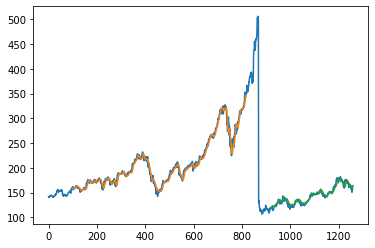

In [66]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

441

In [68]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [69]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583594238,
 0.13668127739511576,
 0.13800876643706944,
 0.12515967438948022,
 0.1337507827175955,
 0.14642454602379462,
 0.14509705698184094,
 0.14256731371321218,
 0.1377582968065122,
 0.146474639949906,
 0.1611521603005635,
 0.17092047589229803,
 0.16961803381340007,
 0.18186599874765175,
 0.17257357545397617,
 0.16904195366311836,
 0.1814902943018159,
 0.1638572323105823,
 0.16105197244834057,
 0.1575704445835942,
 0.1656856606136506,
 0.1723231058234188,
 0.17392611145898557,
 0.18407013149655604,
 0.18146524733876013,
 0.1816906700062617,
 0.1787351283656856,
 

In [70]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.12643217]
101
1 day input [0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013
 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217
 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759
 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584 0.13918597
 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907
 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943
 0.17392611 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359
 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743
 0.1459737  0.14116468 0.14958046 

9 day output [[0.13220668]]
10 day input [0.1101315  0.10289292 0.10276769 0.10807765 0.10810269 0.11060739
 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877
 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583
 0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181
 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604 0.15769568
 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732
 0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  

18 day output [[0.1343061]]
19 day input [0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013
 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217
 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759
 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584 0.13918597
 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907
 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943
 0.17392611 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359
 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743
 0.1459737  0.14116468 0.14958046 0.14875391 0.14108954 0.13139637
 0.12673763 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516
 0.13212273 0.13470257 0.14311835 0.12643217 0.1279496  0.12919895
 0.13009019 0.13069418 

27 day output [[0.13603306]]
28 day input [0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181
 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604 0.15769568
 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732
 0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271
 0.11994991 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835
 0.12643217 0.1279496  0.12919895 0.13009019 0.13069418 0.13111354
 0.13143219 0.131704   0.13195795 0.13220668 0.13245408 0.1327001
 0.1329435  0.13318306

In [71]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

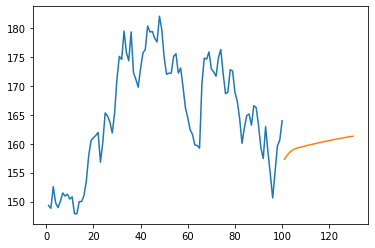

In [75]:
plt.plot(day_new,scaler.inverse_transform(df1[1160:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

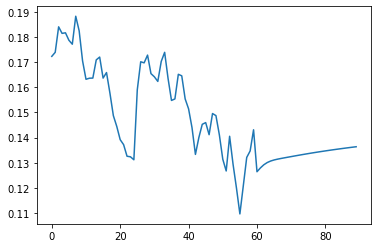

In [73]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

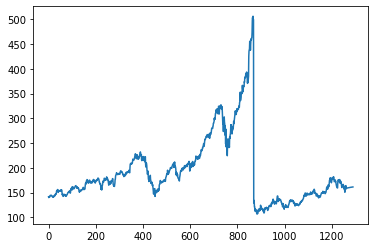

In [74]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)